In [1]:
# explicitly require this experimental feature
from sklearn.experimental import enable_iterative_imputer  # noqa
# now you can import normally from sklearn.impute
from sklearn.impute import IterativeImputer # 임퓨터 불러오기
import pandas as pd
import seaborn as sns
import numpy as np
df=sns.load_dataset('mpg')

In [4]:
'''imputation : 대치법, 결측치가 많은 결측 자료가 있을 때, 표준이나 대표성이 있는 다른 데이터를 활용하여
               대체될 수 있는 값들로 계산하여 입력하는 과정 -> 일종의 가짜 데이터를 집어넣은'''

"""sklearn.imputer
- SimpleImputer : 간단한 대체전략/ 평균, 중앙값, 최빈값과 같은 기본적인 통계치를 사용
- KNNImputer : k-최근접 이웃 알고리즘을 사용하여 결측치를 채움
- IterativeImputer : 다변량(Imputing multivariate data) 결측치 문제에 사용된다.
- MissingIndicator : 결측치가 있는 위치를 나타내는 특성을 새로 생성 -> 결측치의 유무를 추가적인 정보로 활

'imputation : 대치법, 결측치가 많은 결측 자료가 있을 때, 표준이나 대표성이 있는 다른 데이터를 활용하여\n               대체될 수 있는 값들로 계산하여 입력하는 과정 -> 일종의 가짜 데이터를 집어넣은'

<Axes: xlabel='origin', ylabel='count'>

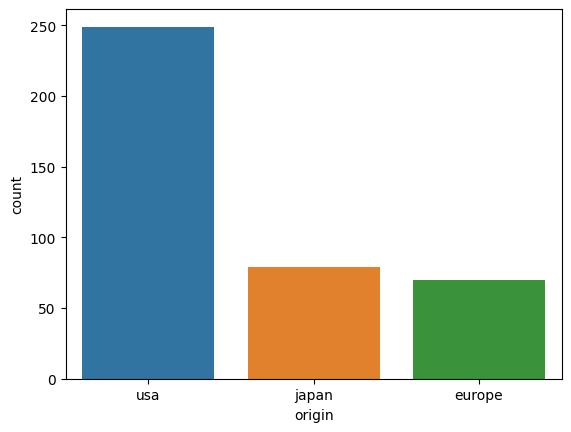

In [7]:
sns.countplot(data= df, x='origin')

## mpg 컬럼 설명서
- 연비 mpg
- 실린더 cylinders
- 배기량 dispalcement
- 마력 horsepower
- 무게 weight
- 제로백 acceleration

In [8]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


## 기존에 배웠던
- 평균대치
- 선형보간
- sklearn iterative imputer를 사용해서 실제 결측값을 대체하고
- 해당 결측값을 대체한 것을 회귀분석을 통해 mse 차이가 어떤 식으로 나오는지 비교하려고 합니다.
- mse 오차에 대한 개념 예측한 값과 실제 값의 차이


- 선형보간의 경우는 결국 interpolation 기존에 데이터를 보고 결측을 메꾸는 방식인데
- 해당 방식이 과연 정말 데이터의 올바른 결측치 대체 방법인지?

In [10]:
type(df)

pandas.core.frame.DataFrame

In [9]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [11]:
df.dropna(inplace=True) #마력에서 결측치 6개를 그냥 날려보냄

In [12]:
df_x= df[['cylinders','displacement','horsepower','acceleration','weight']]

In [14]:
## 결측치를 임의로 만들어야 하는 상황
msv=np.random.randint(0,397, size=30) #전체 398행이므로 그에 맞게 설정

In [15]:
df_x.iloc[msv] = np.nan

In [16]:
#결측치를 만들기
df_x.isna().sum()

cylinders       29
displacement    29
horsepower      29
acceleration    29
weight          29
dtype: int64

In [47]:
df_sp =pd.concat([df_x ,df['mpg']],axis=1) # axis = 1 -> dataframe을 좌우로 붙여준다.
df_sp1 =pd.concat([df_x ,df['mpg']],axis=1)
df_sp2 =pd.concat([df_x ,df['mpg']],axis=1)
df_sp3 =pd.concat([df_x ,df['mpg']],axis=1)

<Axes: >

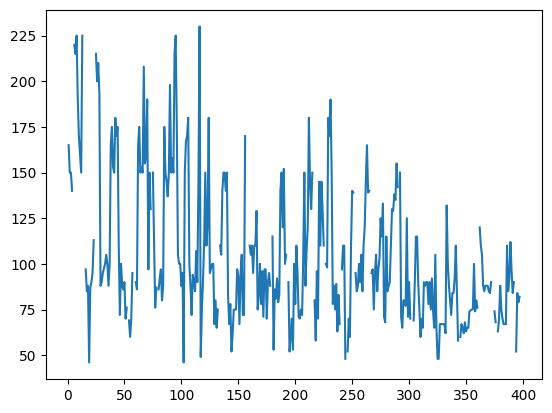

In [48]:
df_sp2.horsepower.plot()

### 평균으로 대체 -> simpleimputing

- cylinders       28
- displacement    28
- horsepower      34
- weight          28

In [49]:
df_x.cylinders.mean()

5.484848484848484

In [50]:
df_x.displacement.mean()

195.84848484848484

In [51]:
df_x.horsepower.mean()

105.20110192837465

In [52]:
df_x.weight.mean()

2988.206611570248

In [53]:
df_x.acceleration.mean()

15.502203856749311

In [54]:
# 결측치들 대체하기
df_sp1['cylinders'] = df_sp1['cylinders'].fillna(df_x.cylinders.mean())
df_sp1['displacement'] = df_sp1['displacement'].fillna(df_x.displacement.mean())
df_sp1['horsepower'] = df_sp1['horsepower'].fillna(df_x.horsepower.mean())
df_sp1['weight'] = df_sp1['weight'].fillna(df_x.weight.mean())
df_sp1.acceleration = df_sp1.acceleration.fillna(df_x.acceleration.mean()) #.으로 연결해도 됨.

In [55]:
df_sp1.isna().sum()

cylinders       0
displacement    0
horsepower      0
acceleration    0
weight          0
mpg             0
dtype: int64

In [56]:
# 데이터 세트 분리
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df_sp1.drop('mpg',axis=1), df_sp1['mpg'],test_size=0.3, random_state=111)

In [57]:
import statsmodels.api as sm #회귀 분석에 필요한 모듈
import matplotlib.pyplot as plt # 시각화 모듈

In [58]:
fit_train1 = sm.OLS(y_train, x_train) #  객체 호출

In [59]:
fit_train1 = fit_train1.fit() # Fitting

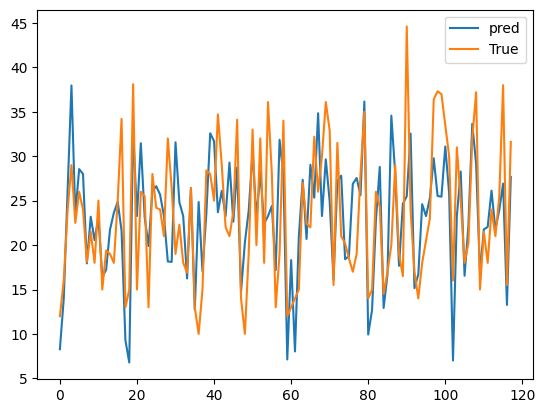

In [60]:
plt.plot(np.array(fit_train1.predict(x_test)),label='pred')
plt.plot(np.array(y_test), label='True')
plt.legend()
plt.show()
#선형 회귀 식 여러개가 작동하고 있는 상황에서 train을 통해 계수를 훈련시켰음. 그것을 토대로
#test에 시험해보는 과정이라고 보면 됨.

In [61]:
from sklearn.metrics import mean_squared_error
mse1 = mean_squared_error(y_true = y_test, y_pred = fit_train1.predict(x_test))
print(mse1)
#평균일 때엔 이정도로 도출, 만약 다른 보간법을 사용했을 때 값이 작아진다면 그 방법이
#해당 데이터셋을 보간하는 데엔 더 좋은 방법일 것

37.86849570479486


## 보간법을 이용해서 진행해보자!
- 선형보간법

In [63]:
df_sp2

,cylinders,displacement,horsepower,acceleration,weight,mpg
0,NaN,NaN,NaN,NaN,NaN,18.0
1,8.0,350.0,165.0,11.5,3693.0,15.0
2,8.0,318.0,150.0,11.0,3436.0,18.0
3,8.0,304.0,150.0,12.0,3433.0,16.0
4,8.0,302.0,140.0,10.5,3449.0,17.0
...,...,...,...,...,...,...
393,NaN,NaN,NaN,NaN,NaN,27.0
394,4.0,97.0,52.0,24.6,2130.0,44.0
395,4.0,135.0,84.0,11.6,2295.0,32.0
396,4.0,120.0,79.0,18.6,2625.0,28.0


In [64]:
df_sp2 = df_sp2.dropna()

In [65]:
df_sp2['cylinders'] = df_sp2['cylinders'].interpolate(method='linear')
df_sp2['displacement'] = df_sp2['displacement'].interpolate(method='linear')
df_sp2['horsepower'] = df_sp2['horsepower'].interpolate(method='linear')
df_sp2['weight'] = df_sp2['weight'].interpolate(method='linear')
df_sp2['acceleration'] = df_sp2['acceleration'].interpolate(method='linear')

<ipython-input-65-68c4b5bf5019>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sp2['cylinders'] = df_sp2['cylinders'].interpolate(method='linear')
<ipython-input-65-68c4b5bf5019>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sp2['displacement'] = df_sp2['displacement'].interpolate(method='linear')
<ipython-input-65-68c4b5bf5019>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [66]:
df_sp2.isna().sum()

cylinders       0
displacement    0
horsepower      0
acceleration    0
weight          0
mpg             0
dtype: int64

In [67]:
df_sp2

,cylinders,displacement,horsepower,acceleration,weight,mpg
1,8.0,350.0,165.0,11.5,3693.0,15.0
2,8.0,318.0,150.0,11.0,3436.0,18.0
3,8.0,304.0,150.0,12.0,3433.0,16.0
4,8.0,302.0,140.0,10.5,3449.0,17.0
6,8.0,454.0,220.0,9.0,4354.0,14.0
...,...,...,...,...,...,...
392,4.0,151.0,90.0,17.3,2950.0,27.0
394,4.0,97.0,52.0,24.6,2130.0,44.0
395,4.0,135.0,84.0,11.6,2295.0,32.0
396,4.0,120.0,79.0,18.6,2625.0,28.0


In [68]:
x_train, x_test, y_train, y_test = train_test_split(df_sp2.drop('mpg',axis=1), df_sp2['mpg'],test_size=0.3, random_state=111)

In [69]:
fit_train2 = sm.OLS(y_train, x_train)
fit_train2 = fit_train2.fit()

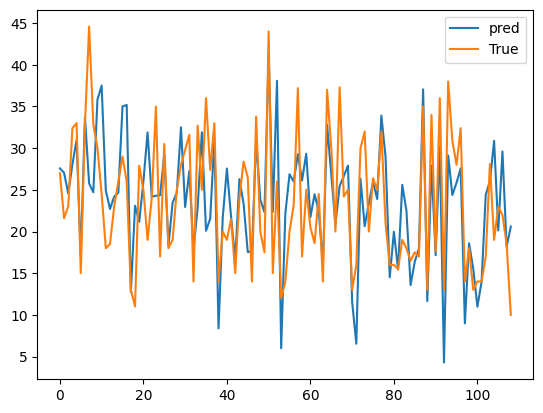

In [70]:
# 실제 예측을 해보자!
plt.plot(np.array(fit_train2.predict(x_test)),label='pred')
plt.plot(np.array(y_test), label='True')
plt.legend()
plt.show()

In [71]:
from sklearn.metrics import mean_squared_error
mse2 = mean_squared_error(y_true = y_test, y_pred = fit_train2.predict(x_test))
print(mse2)
#조금 더 작은 값이기는 하나, 비슷함. 이는 복습 과정에서 새로운 특성을 추가했기 때문이라 여겨짐.

37.85799496884382


### sklearn 패키지 중
- iterativeImputer
- 하이퍼 파라미터들이 정말 다양합니다.
- 모델링 거기에 있는 대부분의 모든 하이퍼파라미터를 다 배우는데
- sklearn 홈페이지에 보면 다 잘 나와있다.

In [72]:
imputer = IterativeImputer(imputation_order = 'descending',
                          max_iter=10, random_state=111,

                           n_nearest_features=4)

df_sp3 =imputer.fit_transform(df_sp3)

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [73]:
# 반환값이 array 만들어진다.
df_sp3

array([[   6.17094054,  239.70611748,  120.89679983,   14.9767547 ,
        3364.20534194,   18.        ],
       [   8.        ,  350.        ,  165.        ,   11.5       ,
        3693.        ,   15.        ],
       [   8.        ,  318.        ,  150.        ,   11.        ,
        3436.        ,   18.        ],
       ...,
       [   4.        ,  135.        ,   84.        ,   11.6       ,
        2295.        ,   32.        ],
       [   4.        ,  120.        ,   79.        ,   18.6       ,
        2625.        ,   28.        ],
       [   4.        ,  119.        ,   82.        ,   19.4       ,
        2720.        ,   31.        ]])

In [78]:
#데이터프레임으로 변환
df_sp3= pd.DataFrame(df_sp3)

In [80]:
df_sp3

,cylinders,displacement,horsepower,acceleration,weight,mpg
0,6.170941,239.706117,120.896800,14.976755,3364.205342,18.0
1,8.000000,350.000000,165.000000,11.500000,3693.000000,15.0
2,8.000000,318.000000,150.000000,11.000000,3436.000000,18.0
3,8.000000,304.000000,150.000000,12.000000,3433.000000,16.0
4,8.000000,302.000000,140.000000,10.500000,3449.000000,17.0
...,...,...,...,...,...,...
387,5.020351,166.156050,94.574822,15.857943,2733.648465,27.0
388,4.000000,97.000000,52.000000,24.600000,2130.000000,44.0
389,4.000000,135.000000,84.000000,11.600000,2295.000000,32.0
390,4.000000,120.000000,79.000000,18.600000,2625.000000,28.0


In [81]:
df_sp3.isna().sum()

cylinders       0
displacement    0
horsepower      0
acceleration    0
weight          0
mpg             0
dtype: int64

In [82]:
df_sp2.columns

Index(['cylinders', 'displacement', 'horsepower', 'acceleration', 'weight',
       'mpg'],
      dtype='object')

In [83]:
df_sp3.columns = ['cylinders', 'displacement', 'horsepower','acceleration', 'weight', 'mpg']

In [84]:
df_sp3

,cylinders,displacement,horsepower,acceleration,weight,mpg
0,6.170941,239.706117,120.896800,14.976755,3364.205342,18.0
1,8.000000,350.000000,165.000000,11.500000,3693.000000,15.0
2,8.000000,318.000000,150.000000,11.000000,3436.000000,18.0
3,8.000000,304.000000,150.000000,12.000000,3433.000000,16.0
4,8.000000,302.000000,140.000000,10.500000,3449.000000,17.0
...,...,...,...,...,...,...
387,5.020351,166.156050,94.574822,15.857943,2733.648465,27.0
388,4.000000,97.000000,52.000000,24.600000,2130.000000,44.0
389,4.000000,135.000000,84.000000,11.600000,2295.000000,32.0
390,4.000000,120.000000,79.000000,18.600000,2625.000000,28.0


In [85]:
x_train, x_test, y_train, y_test = train_test_split(df_sp3.drop('mpg',axis=1), df_sp3['mpg'],test_size=0.3, random_state=111)

In [86]:
fit_train3 = sm.OLS(y_train, x_train)
fit_train3 = fit_train3.fit()

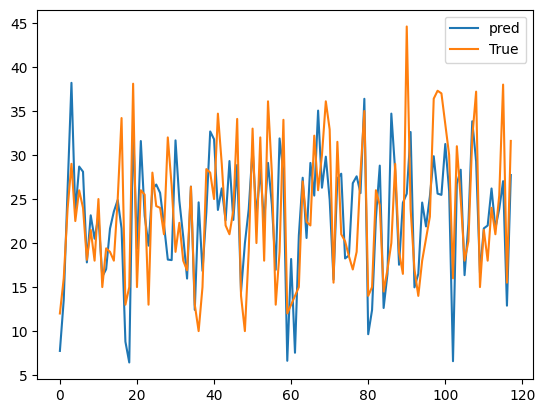

In [87]:
# 실제 예측을 해보자!
plt.plot(np.array(fit_train3.predict(x_test)),label='pred')
plt.plot(np.array(y_test), label='True')
plt.legend()
plt.show()

In [88]:
from sklearn.metrics import mean_squared_error
mse3 = mean_squared_error(y_true = y_test, y_pred = fit_train3.predict(x_test))
print(mse3)

# 좀 더 낮아졌다

35.726292271637796


In [89]:
## 결측치를 어떤 방법이 가장 좋은 방법일까요?
print(mse1, '단순평균대치법')
print(mse2, '선형보간법')
print(mse3, 'iterative imputer')

37.86849570479486 단순평균대치법
37.85799496884382 선형보간법
35.726292271637796 iterative imputer


### 이 지표를 가지고 어떤 식으로 해석해야 하고
- 모든 데이터를 이런 식으로 sklearn 대치만 하면 최고인가?
- 단순하게 평균이나 선형보간이나 iterative 어떤 게 가장 좋다라고는 말할 수 없다.
- 데이터의 관계나 데이터의 분포나, 더 나아가서는 앞단의 데이터에 대한 도메인 지식이 필수적으로 있어야 한다.

- 1.데이터 분석가가 도메인 지식없이 단순하게 수치로만 싸우게되면 결국 이런 수치만 보고 판단해서 가장 낮은 수치만을 좇고 또 한쪽으로만 치우치는 경향
- 2.데이터 분석가가 해석을 할 수 없다. 설득을 할 수 없다.
- 3. why?


- why를 어떤 식으로 설명해야 하는가?
- 기존의 데이터의 분포와 데이터의 관계를 잘 이해하고 있어야 한다.

- 결측치를 대체하는 방법 자체가 위의 방법대로 진행을 한다면
- 해당 방법에 대한 로직은 정확히 이해를 해야 한다.
- 무엇보다 중요한 건 결국 현재 데이터 분포에 대해서 정확히 이해를 하고
- 평균으로만 대체하는 것이 오히려 로직상으로 맞을 수도 있다. 서베이 데이터라고 하는데 무응답 데이터 같은 경우는 다른 데이터와 관계로 대체하는 게 아니라 무응답이기 때문에 그냥 0으로만 대체한다 도메인 로직을 알고 있어야 한다.

- ## 결측치를 대체할 때
- 꼭 도메인에 대한 지식을 가지고 컬럼들 바라보고
- 각 컬럼들간의 데이터 분포와 특히 y값에 대한 분포들도 꼭 살펴보면서
- 어떤 결측치 대체 방법을 사용할지 고민하고 선정해야 한다.

<ipython-input-90-187082222968>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['displacement']) #간단한 분포 그래프 그리기 (sns distplot)


<Axes: xlabel='displacement', ylabel='Density'>

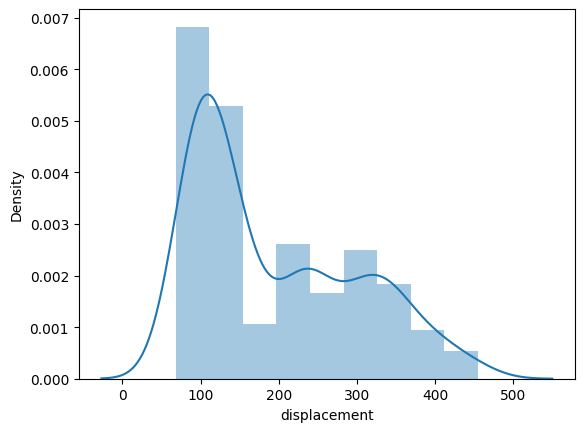

In [90]:
sns.distplot(df['displacement']) #간단한 분포 그래프 그리기 (sns distplot)

<ipython-input-91-0df883a519cc>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['horsepower'])


<Axes: xlabel='horsepower', ylabel='Density'>

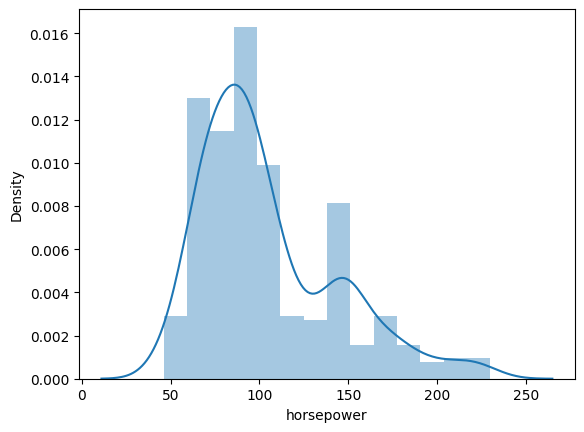

In [91]:
sns.distplot(df['horsepower'])

<ipython-input-92-81c4af9784c0>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['weight'])


<Axes: xlabel='weight', ylabel='Density'>

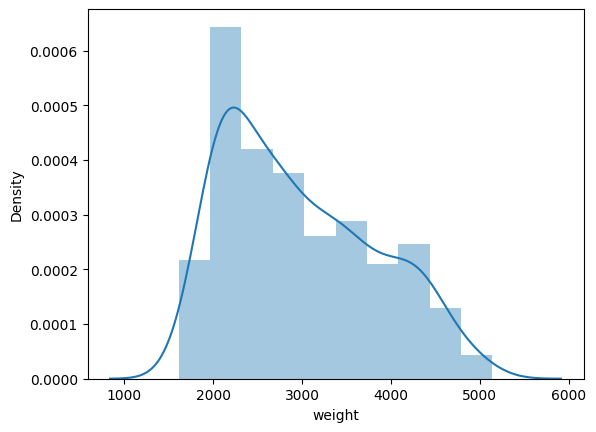

In [92]:
sns.distplot(df['weight'])

<ipython-input-93-c4371f5c2b2f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cylinders'])


<Axes: xlabel='cylinders', ylabel='Density'>

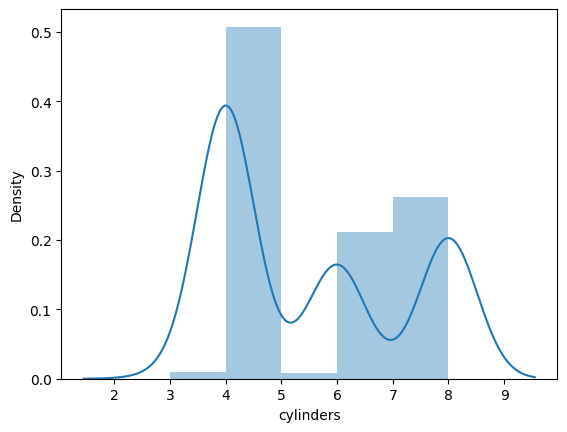

In [93]:
sns.distplot(df['cylinders'])

<ipython-input-94-72c16914290b>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['mpg'])


<Axes: xlabel='mpg', ylabel='Density'>

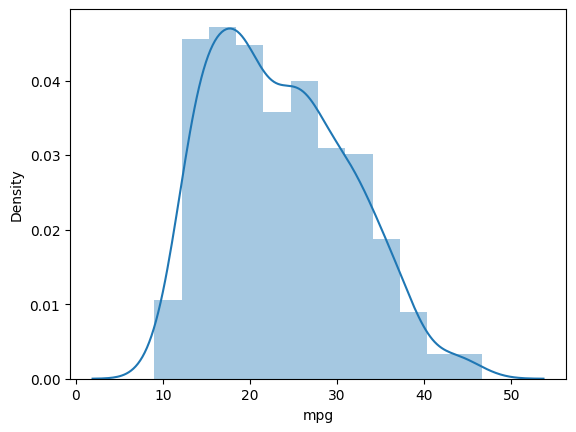

In [94]:
sns.distplot(df['mpg'])

In [95]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


## 필수과제 1
1. simpleimputer (간단한 개념이라 리서치하시고 실제 코드 작성하시고 값에 대해서 결과 정리까지 부탁드립니다. )
- 다양하게 통계치를 지정할 수 있다. ( 평균, 최빈값이 등등 ) 결과가 어떤식으로 바뀌는지 mpg 데이터를 가지고 확인해 주세요!

## 필수과제 2
- 시계열데이터는 제가 구글드라이브에 업로드할 예정입니다.
2. 만약 시계열 데이터라면? 추세가 반영될 수 있기 때문에 선형보간이 더 좋은 결과가 나올 수 있다.
- 시계열데이터를 공유할 예정 -> 해당 데이터를 가지고 결측값을 만들고 오늘 배웠던
- 평균 또는 최빈값등 기초통계량
- 선형보간 등 interpolation
- iterative imputer

- 시계열데이터는 어떤 식으로 결측값을 대체 했을 때 더 좋은 결과가 나오지는 확인하기!
- 다만 시계열데이터를 결측값을 만들기 전에  기존 데이터의 분포와 관계, 컬럼들에 대한 관계들을 확인해 보시고 ( 간단한 시각화로 )
- 결측치를 만들어서 결과를 비교해 주세요.


## 필수과제3
- 최종 결과물은  PDF파일로 정리하여 5장 내로 결과만 정리해서 공유해 주세요!
### 이 과제는 팀끼리 필수과제 제출하셔도 됩니다.
- 개인인 경우는 개인이 과제를 하시고 제출하면 되고
- 팀인 경우는 팀끼리 같이 상의해서 고민하고 하나의 결과물로 다 같이 제출해도 됩니다. 이 결과물은 개인 노션 페이지에도 다 업로드가 되어야 한다.

### 데드라인
- 복습과제는 요번 코드는 너무 어렵기 때문에 한번 직접 따라하는 정도로만 해주시고
- 필수과제는 2주의 시간 동안 진행하고 10/8까지 필수과제는 제출해 주시면 됩니다.
- 모든 필수과제는 다 따로따로 제출해야 합니다.
- 복습과제는 일주일 기한 넘지 않게 잘 제출해 주세요.
